In [1]:
from node import Node
from CART import CART
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from contextlib import redirect_stdout
from sklearn import tree
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('LoanData.csv').drop(['Loan_ID'],axis=1).dropna()
data.head(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,Yes,3.0,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
1,Male,No,3.0,Graduate,No,12500,3000.0,320.0,360.0,1.0,Rural,N
2,Male,Yes,3.0,Graduate,No,3029,0.0,99.0,360.0,1.0,Urban,Y
3,Male,Yes,3.0,Not Graduate,Yes,7100,0.0,125.0,60.0,1.0,Urban,Y
5,Male,Yes,3.0,Graduate,Yes,5266,1774.0,187.0,360.0,1.0,Semiurban,Y


In [3]:
one_hot = pd.get_dummies(data['Property_Area'])
data = data.drop(['Property_Area'],axis = 1)
data = data.join(one_hot)
replace_dict={
    'Gender': {'Male': 0, 'Female': 1},
    'Married':{'Yes':1,'No':0},
    'Education':{'Not Graduate':0,'Graduate':1},
    'Self_Employed':{'Yes':1,'No':0},
    'Loan_Status':{'Y':1,'N':0},
    }
data.replace(replace_dict, inplace=True) 


In [4]:
data.head(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Rural,Semiurban,Urban
0,0,1,3.0,1,0,3036,2504.0,158.0,360.0,0.0,0,0,1,0
1,0,0,3.0,1,0,12500,3000.0,320.0,360.0,1.0,0,1,0,0
2,0,1,3.0,1,0,3029,0.0,99.0,360.0,1.0,1,0,0,1
3,0,1,3.0,0,1,7100,0.0,125.0,60.0,1.0,1,0,0,1
5,0,1,3.0,1,1,5266,1774.0,187.0,360.0,1.0,1,0,1,0


In [5]:
X=data.drop(['Loan_Status'],axis=1)
y=pd.DataFrame(data.loc[:,'Loan_Status'])

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y)

In [7]:
classifier=CART(max_depth=4,min_leaf_size=4)
classifier.fit(X_train,y_train)
classifier.print_CART()

CART info: max_depth=4 min_leaf_size=4 
GI:0.31241958852506513 ATR:Credit_History
|--------GI:0.32462051163507477 ATR:Semiurban
|--------|--------GI:0.21486625514403287 ATR:LoanAmount VAL:140.0
|--------|--------|--------GI:0.3438155136268342 ATR:CoapplicantIncome VAL:8774.4
|--------|--------|--------|--------[Leaf: 0]
|--------|--------|--------|--------[Leaf: 1]
|--------|--------|--------GI:0.11906721536351156 ATR:Self_Employed
|--------|--------|--------|--------[Leaf: 1]
|--------|--------|--------|--------[Leaf: 1]
|--------|--------GI:0.3808775937559489 ATR:CoapplicantIncome VAL:13534.8
|--------|--------|--------[Leaf: 0]
|--------|--------|--------GI:0.37499999999999994 ATR:LoanAmount VAL:462.0
|--------|--------|--------|--------[Leaf: 0]
|--------|--------|--------|--------[Leaf: 1]
|--------GI:0.1572897761645493 ATR:LoanAmount VAL:378.0
|--------|--------[Leaf: 1]
|--------|--------GI:0.15550239234449753 ATR:LoanAmount VAL:177.4
|--------|--------|--------[Leaf: 0]
|------

In [8]:
classifier.score(X_test,y_test)

0.8194444444444444

In [9]:
clf = DecisionTreeClassifier(max_depth=4,min_samples_leaf=4)
fit_tree=clf.fit(X_train,y_train)
scikit_acc=clf.score(X_test,y_test)

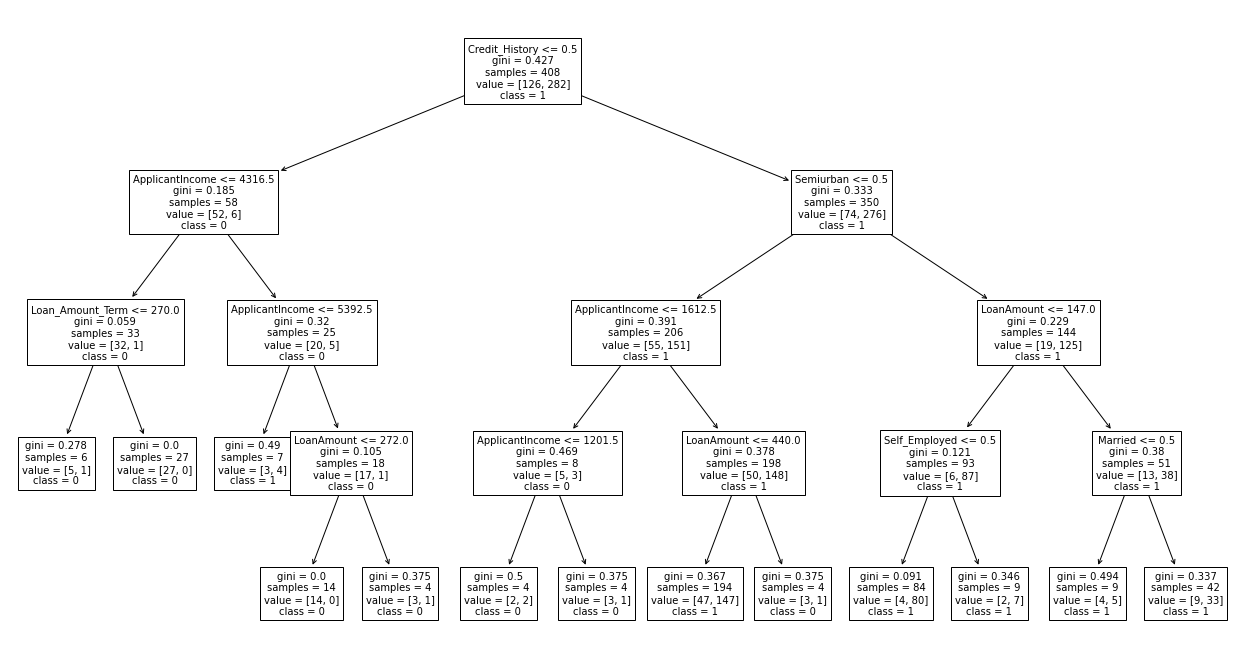

In [10]:
plt.figure(figsize=(22,12))
tree.plot_tree(clf, fontsize=10,feature_names=X.columns, class_names=['0','1'])
plt.show()

In [11]:
results=pd.DataFrame()
for max_depth in range(3,30,3):
    for min_size in range(1,12,2):
        classifier=CART(max_depth=max_depth,min_leaf_size=min_size)
        classifier.fit(X_train,y_train)
        acc=classifier.score(X_test,y_test)
        clf = DecisionTreeClassifier(max_depth=max_depth,min_samples_leaf=min_size)
        clf.fit(X_train,y_train)
        scikit_acc=clf.score(X_test,y_test)
        results = results.append({'Max_depth' : max_depth, 'Min_size' : min_size, 'Accuracy' : acc, 'SciKit_accuracy' :scikit_acc }, ignore_index = True) 


In [12]:
results=results.sort_values(by=['Accuracy'],ascending=False,)
results.head(10)

,Accuracy,Max_depth,Min_size,SciKit_accuracy
0,0.819444,3.0,1.0,0.819444
2,0.819444,3.0,5.0,0.819444
3,0.819444,3.0,7.0,0.819444
4,0.819444,3.0,9.0,0.819444
5,0.819444,3.0,11.0,0.819444
1,0.819444,3.0,3.0,0.833333
11,0.819444,6.0,11.0,0.736111
9,0.805556,6.0,7.0,0.777778
10,0.805556,6.0,9.0,0.736111
7,0.805556,6.0,3.0,0.791667
